### Galaxy Stellar Mass Function

Plot the galaxy stellar mass function for each of our selections:

- $\mathrm{S_{SFR1}}$ 
- $\mathrm{S_{SFR5}}$ 
- $\mathrm{S_{MAS9}}$ 
- $\mathrm{S_{MAS10}}$ 


In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

from palettable.tableau import GreenOrange_12
cmap = GreenOrange_12.hex_colors

from methods import z_distort
from methods import factor_h

h = 0.673
L = 480.279 /h  # box length

directory = '/lustre/scratch/astro/cl478/protoclusters_data/'  # input data directory
out_directory = 'output/'   # output image directory

Load the galaxy data for all selections at all redshifts

In [6]:
redshifts = ['2p07','3p10','3p95','5p03','5p92','6p97','8p22','8p93','9p72']
zees = [float(z.replace('p','.')) for z in redshifts]

In [8]:
gals_sfr = [None] * len(redshifts)
gals_mstar = [None] * len(redshifts)

for i, z in enumerate(redshifts):
    print i, z
    
    gals_sfr[i] = pd.read_csv('%shenriques2015a_z%s_sfr_r200.csv'%(directory,z), 
                              skiprows=122, skipfooter=1, engine='python')
    
    gals_mstar[i] = pd.read_csv('%shenriques2015a_z%s_stellarMass_r200.csv'%(directory,z), 
                                skiprows=122, skipfooter=1, engine='python')
    
    gals_mstar[i] = factor_h(gals_mstar[i], h)
    gals_sfr[i] = factor_h(gals_sfr[i], h)
    

0 2p07
1 3p10
2 3p95
3 5p03
4 5p92
5 6p97
6 8p22
7 8p93
8 9p72


Plot the mass function. $\mathrm{S_{SFR5}}$ is conditioned and masked within the redshift loop.

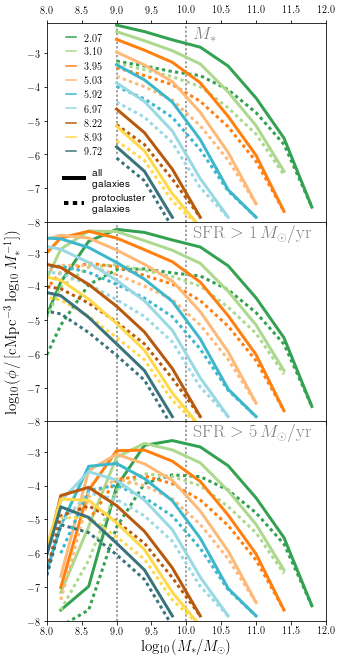

In [22]:
binLimits = np.linspace(6.8, 12.8, 16)
bins = np.linspace(7, 12.6, 15)
#print binLimits, bins

fig = plt.figure(figsize=(5,11))

gs = gridspec.GridSpec(3,1)

gs.update(wspace=0, hspace=0)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])

for ax, galaxy in zip([ax1, ax2, ax3],[gals_mstar, gals_sfr, gals_sfr]):
    
    for i, (gals,z) in enumerate(zip(galaxy, zees)):
        
        if ax == ax3:  # SFR5 mask
            mask = gals['zn_sfr'] > 5
        else:
            mask = np.array([True] * len(gals))
            

        phi, dummy = np.histogram(np.log10(gals[mask]['zn_stellarMass'] * 1e10), bins=binLimits)
        phi = (phi / L**3) / (binLimits[1] - binLimits[0])

        ax.plot(bins, np.log10(phi), c=cmap[i], label=z, linestyle='solid', linewidth=3)

        phi, dummy = np.histogram(np.log10(gals.loc[mask & (gals['z0_central_mcrit200'] > 1.48e4)]['zn_stellarMass'] \
                                           * 1e10), bins=binLimits)
        
        phi = (phi / L**3) / (binLimits[1] - binLimits[0])

        ax.plot(bins, np.log10(phi), c=cmap[i], linestyle='dotted', linewidth=3)
        
        
ax3.set_xlabel("$\mathrm{log_{10}}(M_* / M_{\odot})$", size=15)

# ax1.set_xticks([9, 10, 11, 12])
# ax2.set_xticks([8, 9, 10, 11, 12])
# ax3.set_xticks([9, 10, 11, 12])

ax1.set_xlim(8, 12)
ax2.set_xlim(8, 12)
ax3.set_xlim(8, 12)

for ax in [ax1,ax2,ax3]:
    ax.set_ylim(-8, -2.1)
    ax.vlines(10, -8, -1, linestyle='dotted', color='grey')
    
ax2.set_ylabel("$\mathrm{log_{10}}(\phi \,/\, [\mathrm{cMpc^{-3}} \; \mathrm{log_{10}}\,M_{*}^{-1}])$", size=15)
    
ax1.vlines(9, -6, -1, linestyle='dotted', color='grey')
ax2.vlines(9, -8, -1, linestyle='dotted', color='grey')
ax3.vlines(9, -8, -1, linestyle='dotted', color='grey')
    
ax1.tick_params(labeltop=True, top=True, labelbottom=False)
ax2.set_xticklabels([])

ax1.text(10.1, -2.65, '$M_{*}$', color='grey', size=18)
ax2.text(10.1, -2.65, '$\mathrm{SFR} > 1 \, M_{\odot} / \mathrm{yr}$', color='grey', size=18)
ax3.text(10.1, -2.65, '$\mathrm{SFR} > 5 \, M_{\odot} / \mathrm{yr}$', color='grey', size=18)

line_z = []
for i in range(len(zees)):
    line_z.append(plt.Line2D((0,0.5),(0,0), color=cmap[i], linestyle='solid'))
    
    
leg = ax1.legend(handles=[line for line in line_z], labels=["$%.2f$"%z for z in zees], 
           prop={'size':10}, frameon=False, bbox_to_anchor=(0.23, 0.99), handlelength=1)


line_all = plt.Line2D((0,1),(0,0), color='black', linestyle='solid', linewidth=4)
line_pcs = plt.Line2D((0,1),(0,0), color='black', linestyle='dotted', linewidth=4)

ax2.legend(handles=[line_all, line_pcs], 
           labels=['all \ngalaxies', 'protocluster \ngalaxies'], 
           prop={'size':10}, frameon=False, bbox_to_anchor=(0.03, 1))


# fig.savefig(out_directory+'gsmf.png', dpi=300, bbox_inches='tight')